# Question: 

## Does the number of emergency calls increase during a new moon? A new moon occurs when the Moon is positioned between the Earth and the Sun. During this phase, the side of the Moon that is illuminated by the Sun is facing away from Earth, making it nearly invisible to observers on Earth. Throughout history, people have associated lunar phases with changes in mood, sleep, and even mental health.

### Import Data and Dependancies 

In [33]:
import pandas as pd 
import databuilder
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

#Load all data 
db = databuilder.DataBuilder()

Loading ./Resources/COS2019.csv
Successfully loaded data for ./Resources/COS2019.csv
Loading ./Resources/COS2020.csv
Successfully loaded data for ./Resources/COS2020.csv
Loading ./Resources/COS2021.csv
Successfully loaded data for ./Resources/COS2021.csv
Loading ./Resources/COS2022.csv
Successfully loaded data for ./Resources/COS2022.csv
Loading ./Resources/COS2023.csv
Successfully loaded data for ./Resources/COS2023.csv

Successfully combined 5 files
Total records: 1,150,331
Loading ./Resources/full_moons.csv
Successfully loaded data for ./Resources/full_moons.csv

Successfully combined 1 files
Total records: 1,868
Loading ./Resources/merc_retro.csv
Successfully loaded data for ./Resources/merc_retro.csv

Successfully combined 1 files
Total records: 16
Loading ./Resources/Newmoondata.csv
Successfully loaded data for ./Resources/Newmoondata.csv

Successfully combined 1 files
Total records: 62


In [34]:
# Load the emergency response dataset into Pandas and display first five rows
emergency_response_df = db.get_emergency_data()
display(emergency_response_df.head())

# Load the New Moon dataset into Pandas and display first five rows 
new_moon_df = db.get_new_moon_data()
display(new_moon_df.head())

,INCIDENT,REPORTED,CLOSED,CATEGORY
0,19000004,2019-01-01 00:03:00,2019-01-01 01:22:00,ALS
1,19000006,2019-01-01 00:05:00,2019-01-01 00:29:00,ALS
2,19000008,2019-01-01 00:07:00,2019-01-01 00:20:00,ALS
3,19000011,2019-01-01 00:10:00,2019-01-01 00:23:00,BLS
4,19000013,2019-01-01 00:10:00,2019-01-01 00:36:00,ALS


,Date,Time,DateTime
0,1/5/19,18:28,2019-01-05 18:28:00
1,2/4/19,14:03,2019-02-04 14:03:00
2,3/6/19,9:03,2019-03-06 09:03:00
3,4/5/19,1:50,2019-04-05 01:50:00
4,5/4/19,15:45,2019-05-04 15:45:00


### Analysis of Emergency Response Dataset 

In [52]:
# Calculate the total number of incidents in the dataset
total_incidents = emergency_response_df.shape[0]
print(f"Total Number of Incidents: {total_incidents}")

# Extract the date from the 'REPORTED' datetime column and create a new column 'REPORTED_DATE'
emergency_response_df['REPORTED_DATE'] = emergency_response_df['REPORTED'].dt.date

# Group the data by 'REPORTED_DATE' and count the number of incidents for each date
emergency_response_df_grouped = emergency_response_df.groupby('REPORTED_DATE').size().reset_index(name='COUNT') 

# Convert the 'REPORTED_DATE' column back to datetime format for consistency in further processing
emergency_response_df_grouped['REPORTED_DATE'] = pd.to_datetime(emergency_response_df_grouped['REPORTED_DATE'])

# Display the number of unique reporting dates
print(len(emergency_response_df_grouped))

# Display the first 10 rows of the grouped DataFrame for a quick preview
display(emergency_response_df_grouped.head(10))

# Display summary information about the grouped DataFrame
emergency_response_df_grouped.info()

Total Number of Incidents: 1150331
1826


,REPORTED_DATE,COUNT
0,2019-01-01,555
1,2019-01-02,621
2,2019-01-03,566
3,2019-01-04,613
4,2019-01-05,538
5,2019-01-06,538
6,2019-01-07,595
7,2019-01-08,605
8,2019-01-09,545
9,2019-01-10,586


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   REPORTED_DATE  1826 non-null   datetime64[ns]
 1   COUNT          1826 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 28.7 KB


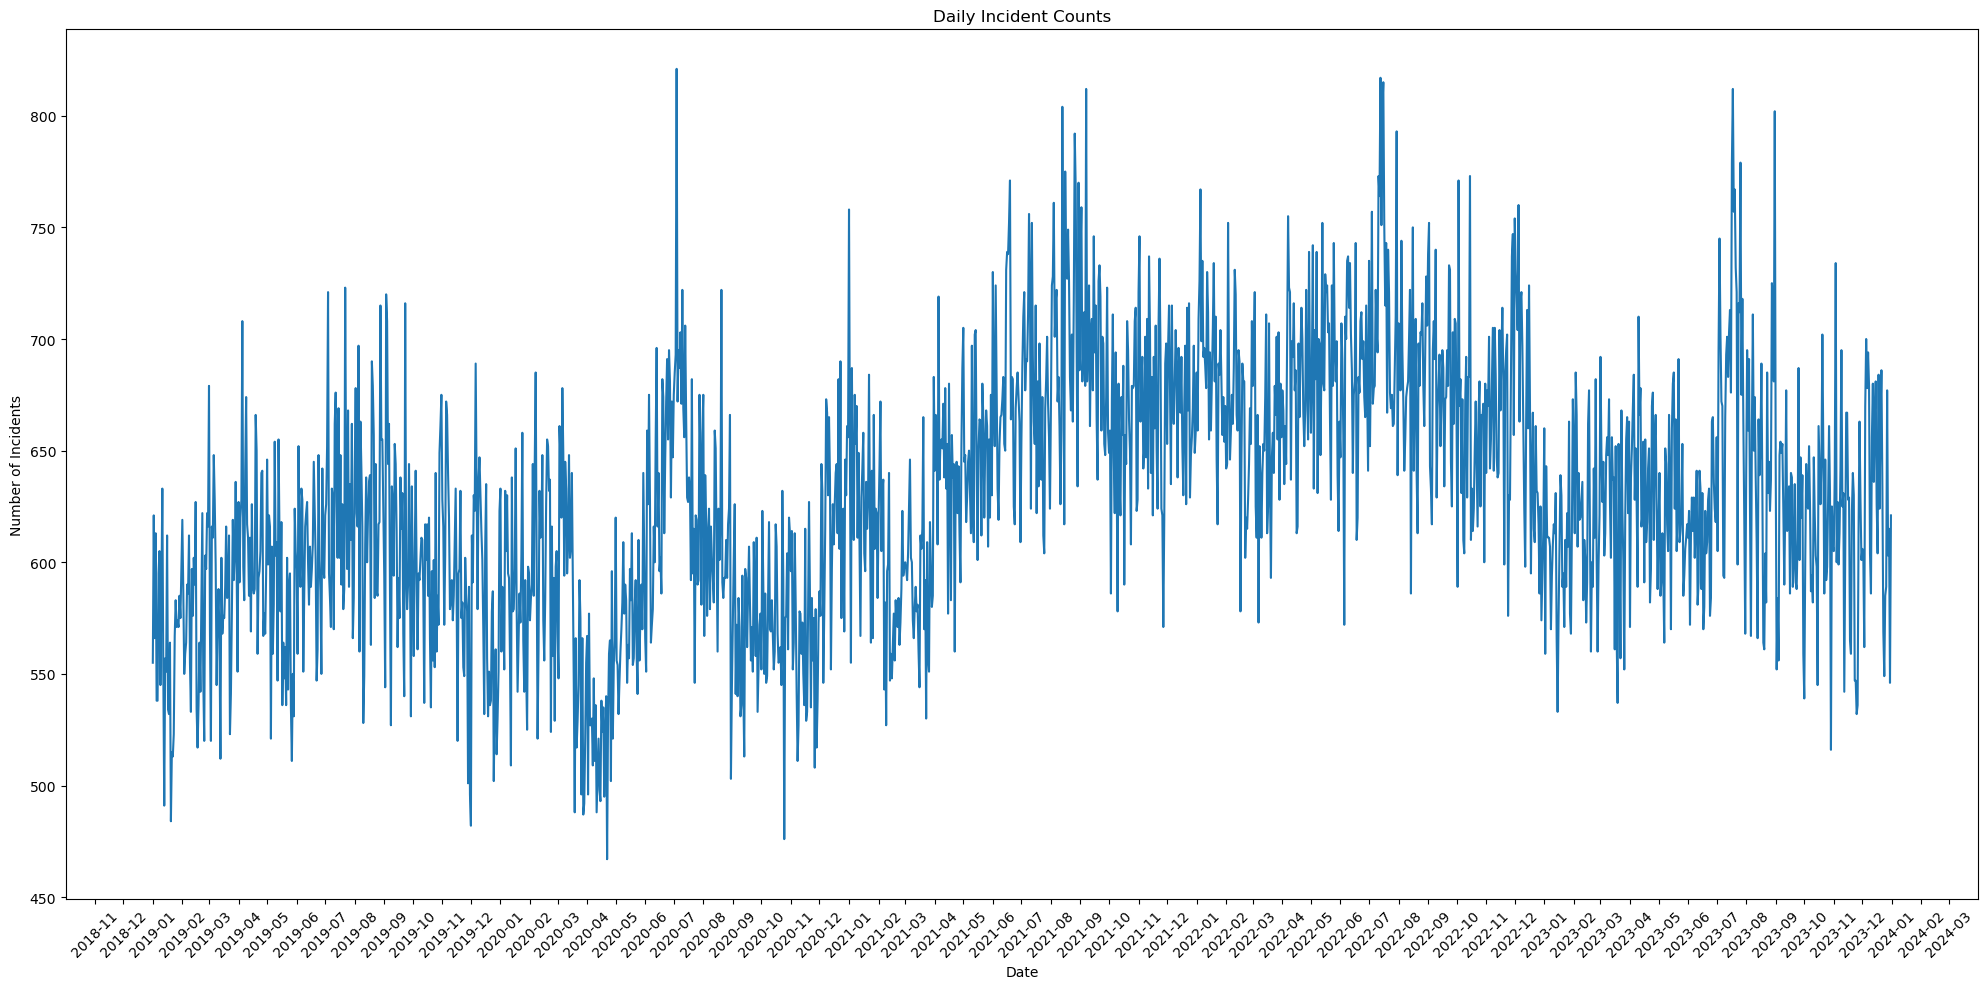

In [53]:
# Create a figure and axis object with a specified size of 20x10 inches
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the daily incident counts over time
# 'REPORTED_DATE' on the x-axis and 'COUNT' on the y-axis
ax.plot(emergency_response_df_grouped['REPORTED_DATE'], emergency_response_df_grouped['COUNT'])

# Add a title to the plot
plt.title('Daily Incident Counts')

# Label the x-axis as 'Date'
plt.xlabel('Date')

# Label the y-axis as 'Number of Incidents'
plt.ylabel('Number of Incidents')

# Set the major locator for the x-axis to display ticks at the start of each month
ax.xaxis.set_major_locator(mdates.MonthLocator())

# Format the x-axis labels to show year and month 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent overlapping of plot elements
plt.tight_layout()

# Display the plot
plt.show()

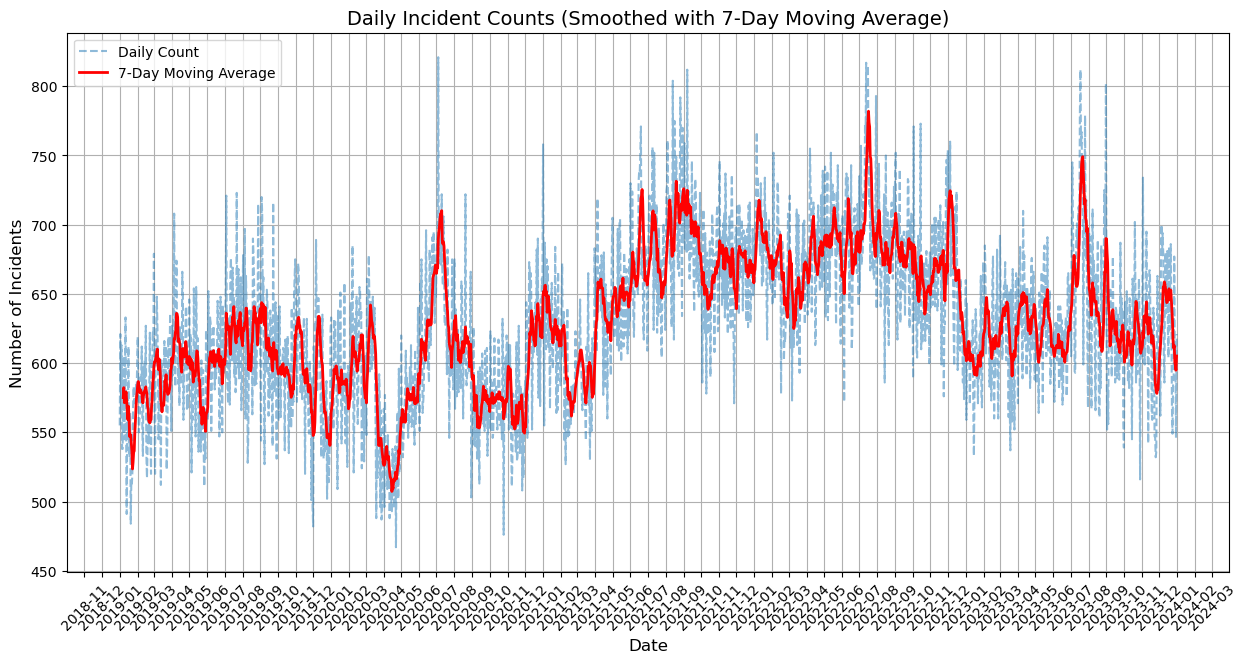

In [54]:
# Create a copy of the grouped DataFrame to avoid modifying the original data
emergency_response_df_grouped_7= emergency_response_df_grouped

# Calculate the 7-day moving average of the 'COUNT' column to smooth out daily fluctuations
emergency_response_df_grouped_7['7-day MA'] = emergency_response_df_grouped_7['COUNT'].rolling(window=7).mean()

# Create a figure and axis object with a specified size of 15x7 inches
fig, ax = plt.subplots(figsize=(15, 7))

# Plot the original daily incident counts with dashed lines and reduced opacity for better visibility of the moving average
ax.plot(emergency_response_df_grouped_7['REPORTED_DATE'], emergency_response_df_grouped_7['COUNT'], alpha=0.5, label='Daily Count', linestyle='dashed')

# Plot the 7-day moving average with a solid red line to clearly distinguish it from the daily counts
ax.plot(emergency_response_df_grouped_7['REPORTED_DATE'], emergency_response_df_grouped_7['7-day MA'], color='red', linewidth=2, label='7-Day Moving Average')

# Add a title to the plot with a specified font size
plt.title('Daily Incident Counts (Smoothed with 7-Day Moving Average)', fontsize=14)

# Label the x-axis as 'Date' with a specified font size
plt.xlabel('Date', fontsize=12)

# Label the y-axis as 'Number of Incidents' with a specified font size
plt.ylabel('Number of Incidents', fontsize=12)

# Set the major locator for the x-axis to display ticks at the start of each month
ax.xaxis.set_major_locator(mdates.MonthLocator())

# Format the x-axis labels to display year and month 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Display the legend to differentiate between the daily counts and the moving average
plt.legend()

# Add gridlines to the plot to improve readability of the data points
plt.grid(True)


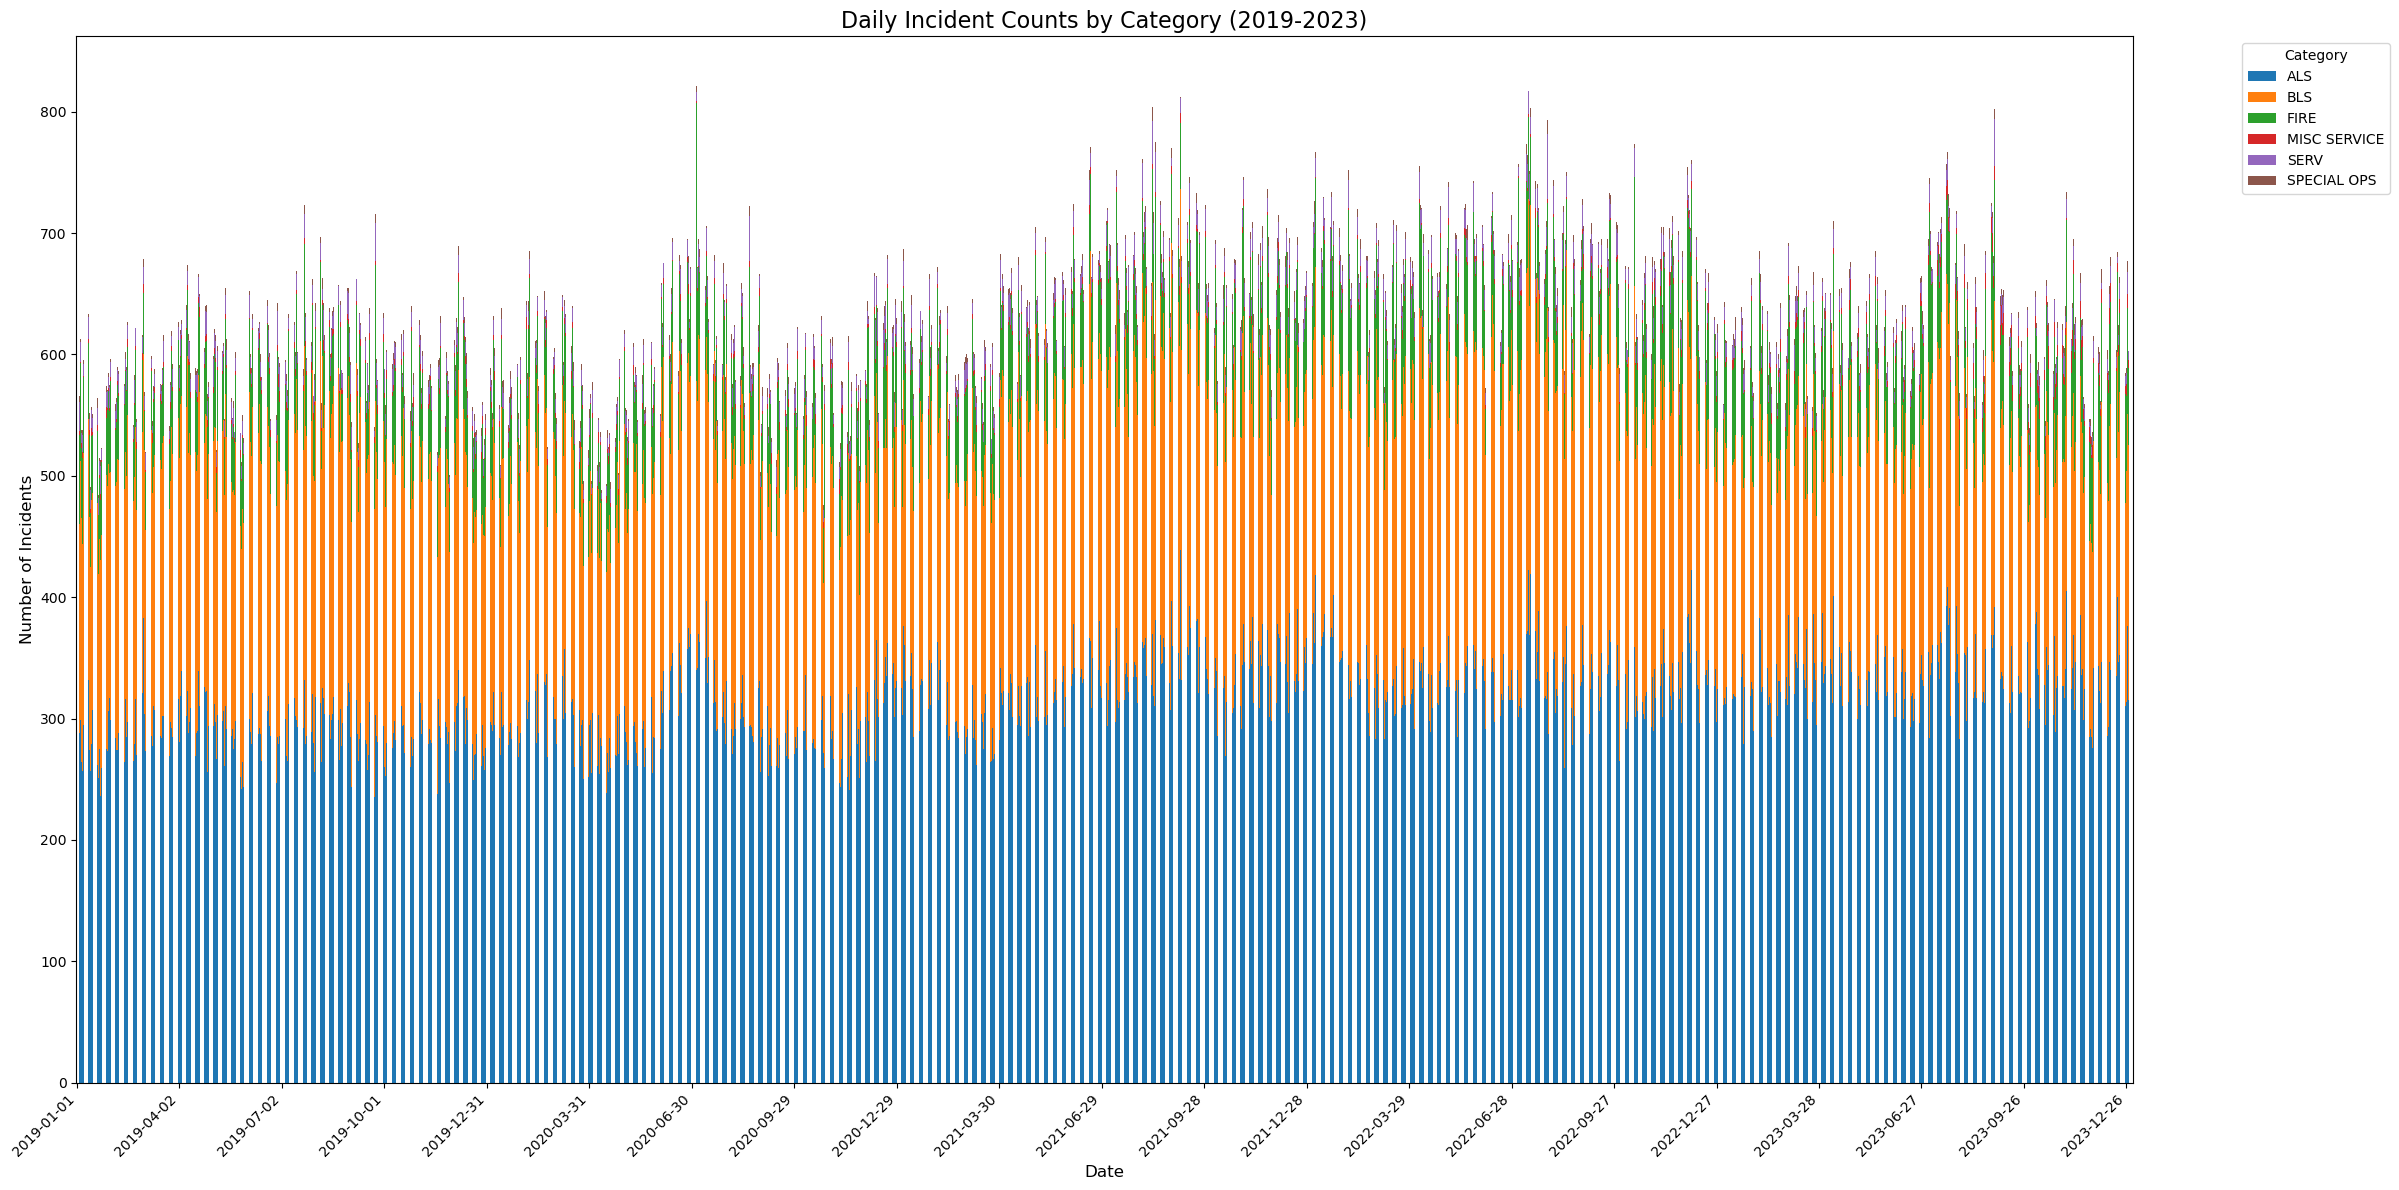

In [56]:
# Ensure the 'REPORTED_DATE' column is in datetime format for accurate date-based operations
emergency_response_df['REPORTED_DATE'] = pd.to_datetime(emergency_response_df['REPORTED_DATE'])

# Filter the dataset to include only incidents reported between the years 2019 and 2023
emergency_df = emergency_response_df[(emergency_response_df['REPORTED_DATE'].dt.year >= 2019) & (emergency_response_df['REPORTED_DATE'].dt.year <= 2023)]

# Group the filtered data by 'REPORTED_DATE' and 'CATEGORY'
# Count the number of incidents for each category per date
# Use unstack to create a pivot table format, filling missing values with 0
category_counts = emergency_df.groupby(['REPORTED_DATE', 'CATEGORY']).size().unstack(fill_value=0)

# Create a figure and axis object with a specified size of 24x12 inches
fig, ax = plt.subplots(figsize=(24, 12))

# Plot a stacked bar chart to visualize the daily incident counts by category
category_counts.plot(kind='bar', stacked=True, ax=ax)

# Add a title to the plot with a specified font size
plt.title('Daily Incident Counts by Category (2019-2023)', fontsize=16)

# Label the x-axis as 'Date' with a specified font size
plt.xlabel('Date', fontsize=12)

# Label the y-axis as 'Number of Incidents' with a specified font size
plt.ylabel('Number of Incidents', fontsize=12)

# Adjust the number of ticks on the x-axis to improve readability
num_ticks = 20 
step = len(category_counts) // num_ticks

# Set custom ticks on the x-axis to display dates at regular intervals
ax.set_xticks(range(0, len(category_counts), step))

# Format the x-axis tick labels to show the date 
# Rotate the labels 45 degrees for better readability and align them to the right
ax.set_xticklabels(category_counts.index.strftime('%Y-%m-%d')[::step], rotation=45, ha='right')

# Display the legend outside the plot to the upper left for better visibility
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout to prevent overlapping of plot elements
plt.tight_layout()

# Display the final plot
plt.show()

#### Analysis of New Moon Dataset 

In [48]:
# Print the number of rows (entries) in the new_moon_df Dataset
print(len(new_moon_df))

# Print the column names of the DataFrame 
print(new_moon_df.columns)

# Print the data types of each column in the DataFrame t
print(new_moon_df.dtypes)

# Display the contents of the DataFrame 
display(new_moon_df)

62
Index(['Date ', 'Time ', 'DateTime', 'REPORTED_DATE'], dtype='object')
Date                     object
Time                     object
DateTime         datetime64[ns]
REPORTED_DATE            object
dtype: object


,Date,Time,DateTime,REPORTED_DATE
0,1/5/19,18:28,2019-01-05 18:28:00,2019-01-05
1,2/4/19,14:03,2019-02-04 14:03:00,2019-02-04
2,3/6/19,9:03,2019-03-06 09:03:00,2019-03-06
3,4/5/19,1:50,2019-04-05 01:50:00,2019-04-05
4,5/4/19,15:45,2019-05-04 15:45:00,2019-05-04
...,...,...,...,...
57,8/16/23,2:38,2023-08-16 02:38:00,2023-08-16
58,9/14/23,18:39,2023-09-14 18:39:00,2023-09-14
59,10/14/23,10:55,2023-10-14 10:55:00,2023-10-14
60,11/13/23,2:27,2023-11-13 02:27:00,2023-11-13


In [51]:
# Total number of New Moons from 2019 - 2023 
total_newmoons = new_moon_df.shape[0]
print(f"Total Number of New Moons: {total_newmoons}")

# Group by date and display count of rows
new_moon_df['REPORTED_DATE'] = new_moon_df['DateTime'].dt.date
new_moon_grouped = new_moon_df.groupby('REPORTED_DATE').size().reset_index(name='COUNT') 

# Convert REPORTED_DATE back to datetime for easier plotting   
new_moon_grouped['REPORTED_DATE'] = pd.to_datetime(new_moon_grouped['REPORTED_DATE'])
(new_moon_grouped['REPORTED_DATE'])

#Display
print(len(new_moon_grouped))
display(new_moon_grouped.head(10))

new_moon_grouped.info()

Total Number of New Moons: 62
62


,REPORTED_DATE,COUNT
0,2019-01-05,1
1,2019-02-04,1
2,2019-03-06,1
3,2019-04-05,1
4,2019-05-04,1
5,2019-06-03,1
6,2019-07-02,1
7,2019-08-01,1
8,2019-08-30,1
9,2019-09-28,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   REPORTED_DATE  62 non-null     datetime64[ns]
 1   COUNT          62 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 KB


### Analysis of Emergency Response Data with New Moon Data

In [41]:
# Display Count for REPORTED_DATE that appears in both emergency_df_grouped and new_moon_grouped
# Step 1: Find the date_match Reported_Date values
date_match = emergency_response_df_grouped[emergency_response_df_grouped['REPORTED_DATE'].isin(new_moon_grouped['REPORTED_DATE'])]

# Display the count of common Reported_Date values
date_match.head()


,REPORTED_DATE,COUNT,7-day MA
4,2019-01-05,538,NaN
34,2019-02-04,559,581.571429
64,2019-03-06,648,608.428571
94,2019-04-05,708,617.571429
123,2019-05-04,616,603.142857


In [42]:
#Remove new moon days from emergency_response_df_grouped
emergency_response_no_newmoon = emergency_response_df_grouped[~emergency_response_df_grouped['REPORTED_DATE'].isin(date_match['REPORTED_DATE'])]
print(f"Total Days of Emergency Calls: {len(emergency_response_df_grouped)}")
print(f"Total Days of Emergency Calls with no new moon: {len(emergency_response_no_newmoon)}")
print(f"Total Days of Emergency Calls with a new moon: {len(date_match)}")

Total Days of Emergency Calls: 1826
Total Days of Emergency Calls with no new moon: 1764
Total Days of Emergency Calls with a new moon: 62


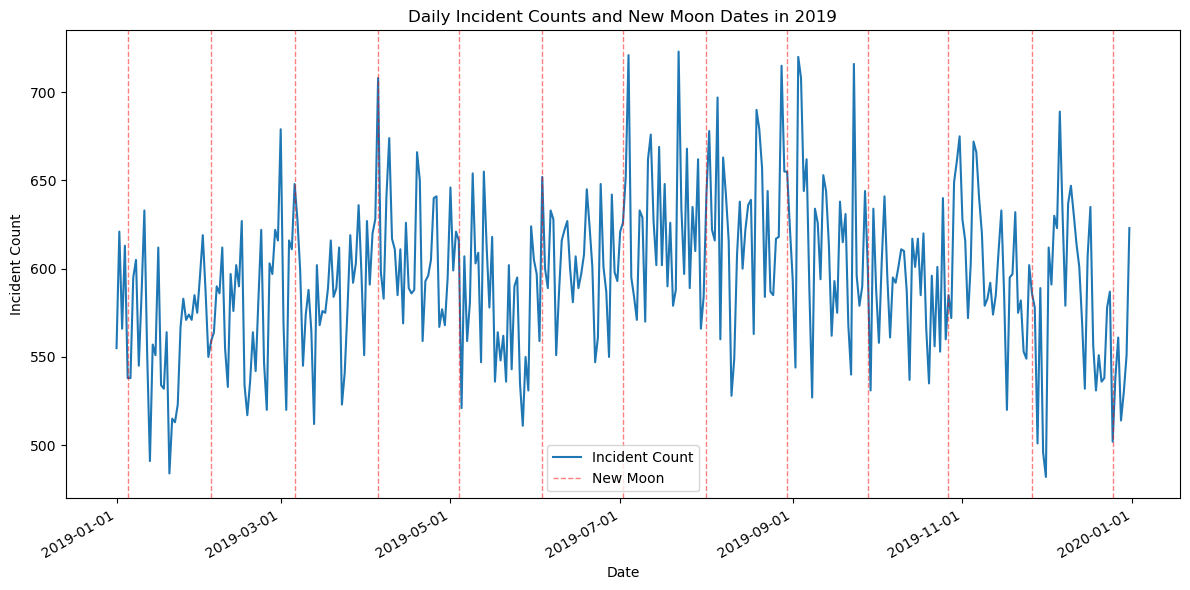

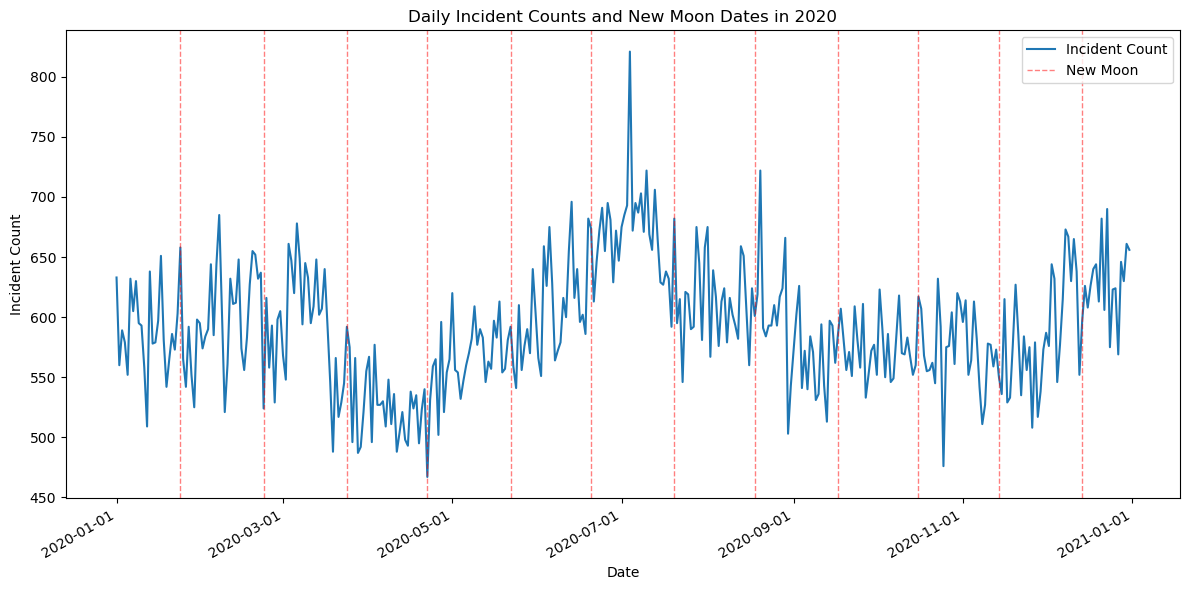

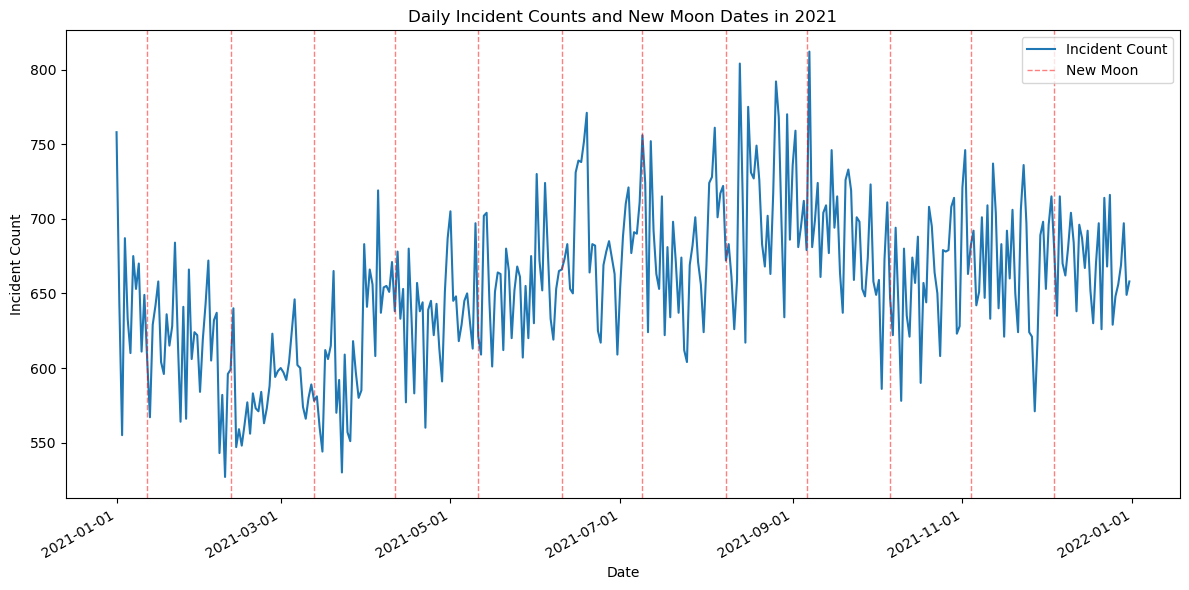

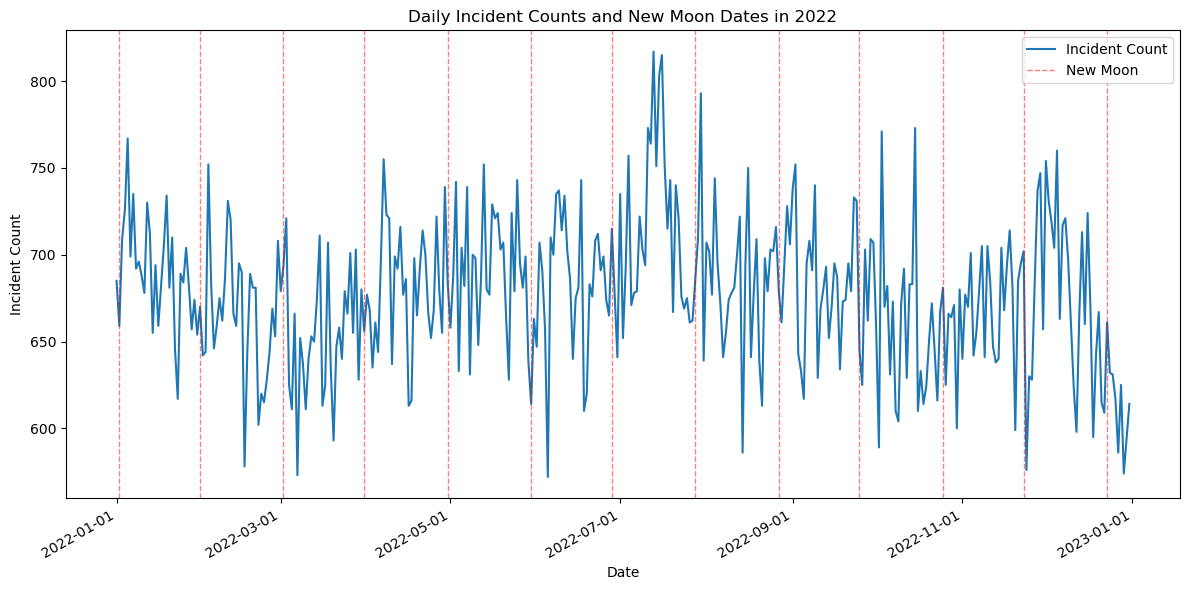

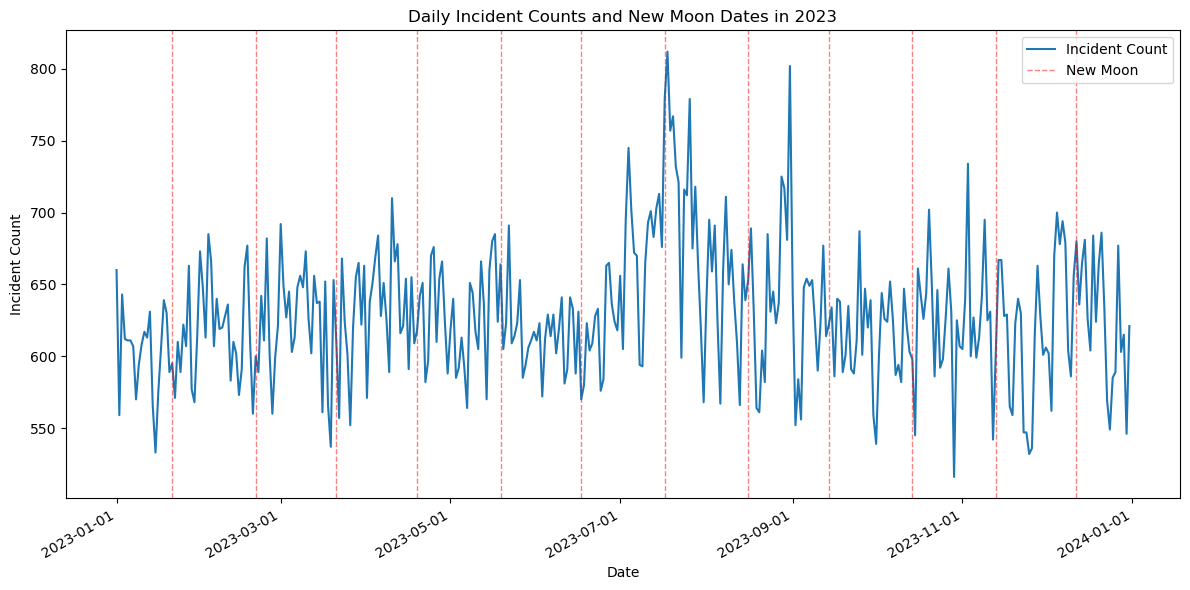

In [43]:
# Group emergency responses by date and count incidents
emergency_response_df_grouped['REPORTED_DATE'] = pd.to_datetime(emergency_response_df_grouped['REPORTED_DATE'])
emergency_response_df_grouped['REPORTED_DATE'] = pd.to_datetime(emergency_response_df_grouped['REPORTED_DATE'])

# Convert new moon dates to datetime
new_moon_df['DateTime'] = pd.to_datetime(new_moon_df['DateTime'])

#For Loop of different years
years = [2019,2020,2021,2022,2023]
for year in years:
    er_df=emergency_response_df_grouped[emergency_response_df_grouped["REPORTED_DATE"].dt.year==year]
    nm_df=new_moon_grouped[new_moon_grouped["REPORTED_DATE"].dt.year==year]

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot incident counts
    ax.plot(er_df['REPORTED_DATE'], er_df['COUNT'], label='Incident Count')

    # Add vertical lines for new moon dates
    for date in nm_df['REPORTED_DATE']:
        ax.axvline(x=date, color='red', linestyle='--', alpha=0.5, linewidth=1)

    # Add labels and title
    ax.set_xlabel('Date')
    ax.set_ylabel('Incident Count')
    ax.set_title(f'Daily Incident Counts and New Moon Dates in {year}')

    # Format x-axis to show dates clearly
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate() # Rotate date labels

    # Add legend
    ax.legend(['Incident Count', 'New Moon'])

    # Show the plot
    plt.tight_layout()
    plt.show()
    

### Statistical Summary of Emergency Response in comparision to New Moon dates 

Descriptive Statistics for Incident Counts:
count    1826.000000
mean      629.973165
std        57.498120
min       467.000000
25%       589.000000
50%       628.000000
75%       671.000000
max       821.000000
Name: COUNT, dtype: float64

Total Incidents Per Year:
Year
2019    217530
2020    216604
2021    239288
2022    247372
2023    229537
Name: COUNT, dtype: int64

Monthly Incident Trends:
Month
2019-01    17445
2019-02    16150
2019-03    18205
2019-04    18309
2019-05    18059
2019-06    18039
2019-07    19339
2019-08    19428
2019-09    18364
2019-10    18470
2019-11    17713
2019-12    18009
2020-01    18155
2020-02    17433
2020-03    18013
2020-04    15847
2020-05    17869
2020-06    18984
2020-07    20257
2020-08    18842
2020-09    17124
2020-10    17857
2020-11    16905
2020-12    19318
2021-01    19503
2021-02    16494
2021-03    18408
2021-04    19224
2021-05    20086
2021-06    20332
2021-07    20957
2021-08    21948
2021-09    20977
2021-10    20341
2021-11    20165


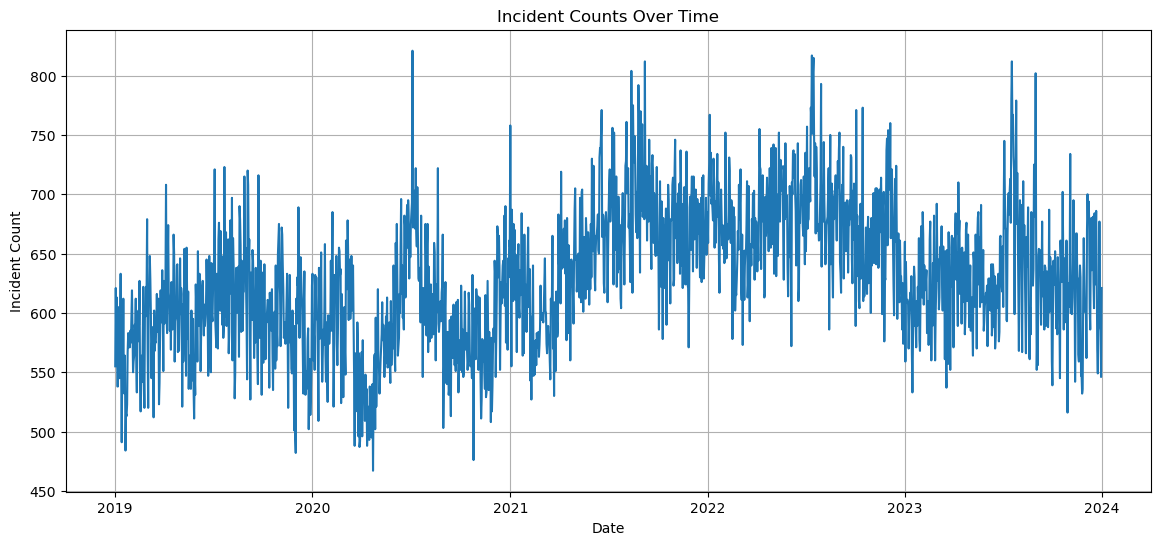

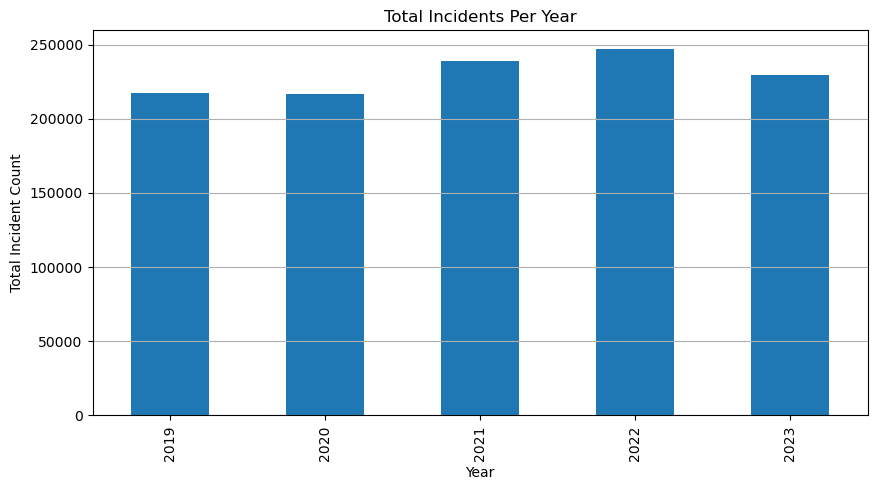

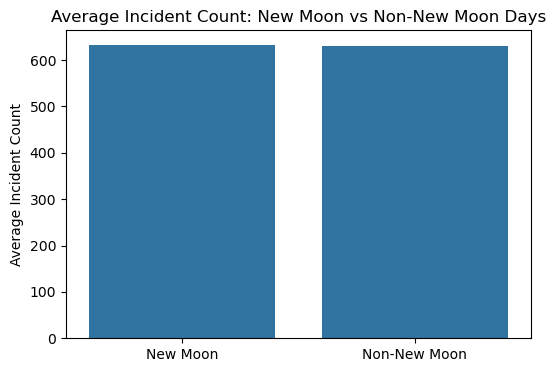

In [44]:
import seaborn as sns

# Basic Descriptive Statistics
desc_stats = emergency_response_df_grouped['COUNT'].describe()
print("Descriptive Statistics for Incident Counts:")
print(desc_stats)

# Incident Counts by Year
emergency_response_df_grouped['Year'] = emergency_response_df_grouped['REPORTED_DATE'].dt.year
incident_by_year = emergency_response_df_grouped.groupby('Year')['COUNT'].sum()
print("\nTotal Incidents Per Year:")
print(incident_by_year)

# Monthly Trends
emergency_response_df_grouped['Month'] = emergency_response_df_grouped['REPORTED_DATE'].dt.to_period('M')
monthly_trends = emergency_response_df_grouped.groupby('Month')['COUNT'].sum()
print("\nMonthly Incident Trends:")
print(monthly_trends)

# Correlation with New Moon Events
# Create a flag for new moon dates
emergency_response_df_grouped['New_Moon'] = emergency_response_df_grouped['REPORTED_DATE'].isin(new_moon_grouped['REPORTED_DATE'])

# Compare average incident counts on new moon days vs. other days
avg_incidents_new_moon = emergency_response_df_grouped[emergency_response_df_grouped['New_Moon']]['COUNT'].mean()
avg_incidents_non_new_moon = emergency_response_df_grouped[~emergency_response_df_grouped['New_Moon']]['COUNT'].mean()

print(f"\nAverage Incident Count on New Moon Days: {avg_incidents_new_moon}")
print(f"Average Incident Count on Non-New Moon Days: {avg_incidents_non_new_moon}")

# Plot: Incidents Over Time
plt.figure(figsize=(14, 6))
sns.lineplot(x='REPORTED_DATE', y='COUNT', data=emergency_response_df_grouped)
plt.title('Incident Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Incident Count')
plt.grid(True)
plt.show()

# Plot: Incidents Per Year
plt.figure(figsize=(10, 5))
incident_by_year.plot(kind='bar')
plt.title('Total Incidents Per Year')
plt.xlabel('Year')
plt.ylabel('Total Incident Count')
plt.grid(axis='y')
plt.show()

# Plot: Comparison of Incidents on New Moon vs Non-New Moon Days
plt.figure(figsize=(6, 4))
sns.barplot(x=['New Moon', 'Non-New Moon'], y=[avg_incidents_new_moon, avg_incidents_non_new_moon])
plt.title('Average Incident Count: New Moon vs Non-New Moon Days')
plt.ylabel('Average Incident Count')
plt.show()

#### New Moon Effect Analysis determines a slight increase of ~2.65 incidents. This shows a potential for a mininal direct impact. Need confirmation with a t-test. 

In [45]:
from scipy.stats import ttest_ind

# Filter data for New Moon and Non-New Moon days
new_moon_incidents = emergency_response_df_grouped[emergency_response_df_grouped['New_Moon'] == 1]['COUNT']
non_new_moon_incidents = emergency_response_df_grouped[emergency_response_df_grouped['New_Moon'] == 0]['COUNT']

# Perform an independent two-sample t-test
t_statistic, p_value = ttest_ind(new_moon_incidents, non_new_moon_incidents, equal_var=False)

# Display results
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Interpret the result
alpha = 0.05  # Significance level
if p_value < alpha:
    print("The difference in incident counts between New Moon and Non-New Moon days is statistically significant.")
else:
    print("There is no statistically significant difference in incident counts between New Moon and Non-New Moon days.")

T-Statistic: 0.36102329622840496
P-Value: 0.7192441708290169
There is no statistically significant difference in incident counts between New Moon and Non-New Moon days.


# Conclusion 

## There’s no strong evidence to suggest that new moon phases influence emergency incident counts.

## The p-value is much greater than the common threshold of 0.05, indicating that the observed difference in incident counts between new moon and non-new moon days is not statistically significant. Any difference observed is likely due to random chance rather than an actual effect of the new moon.


